In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as sk_db
import seaborn as sns
%matplotlib inline

In [266]:
data = sk_db.load_boston()
data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [267]:
df = pd.DataFrame(data=data.data , columns= data.feature_names)
df['Price'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [269]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [270]:
crl = df.corr()
crl

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


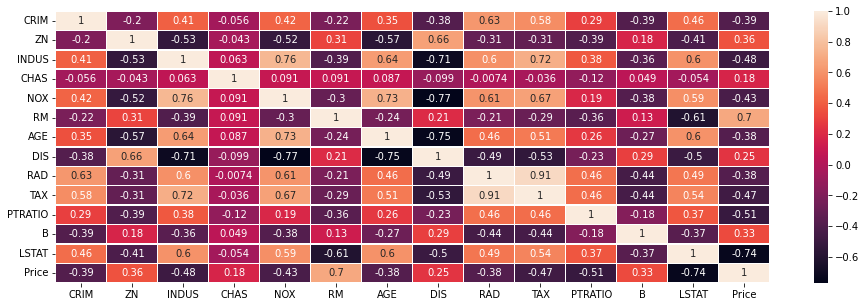

In [271]:
plt.figure(figsize = (16,5))
sns.heatmap(crl,annot=True, linewidths=0.5)
plt.show()


In [272]:
df.drop(['TAX'],axis=1,inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,36.2


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  Price    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [274]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,22.000000,396.900000,37.970000,50.000000


In [275]:
df.iloc[:,[0,1,6,7,8,10,11]].columns

Index(['CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT'], dtype='object')

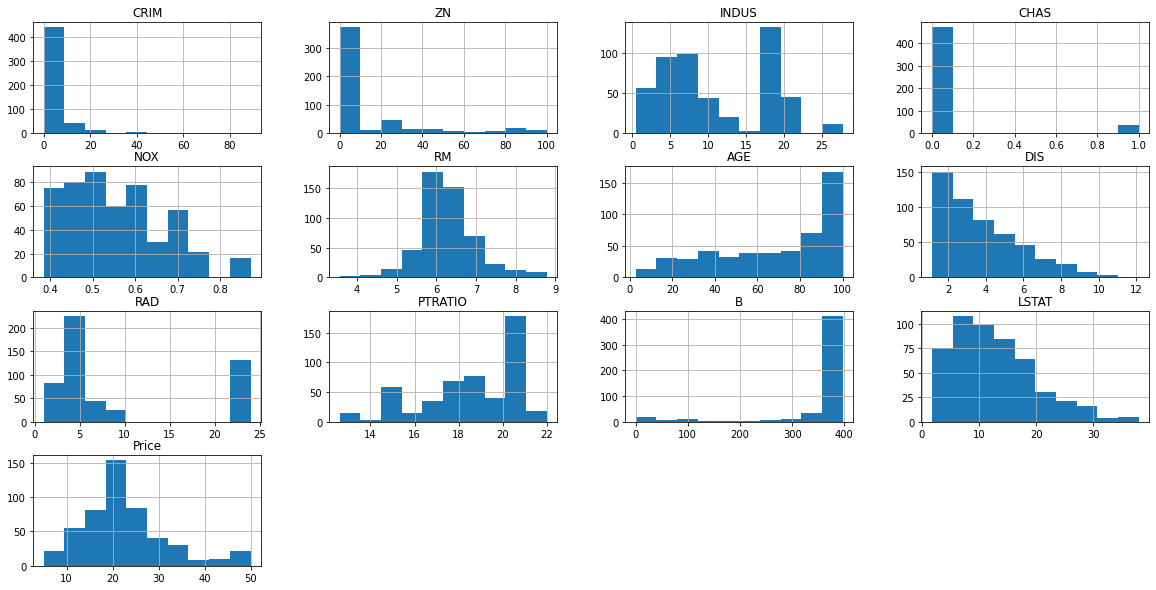

In [276]:
ax = df.hist(figsize=(20,10))

In [277]:
temp_dp = df[['LSTAT','Price']]

Trying to convert LSTAT feature into normal distribution.

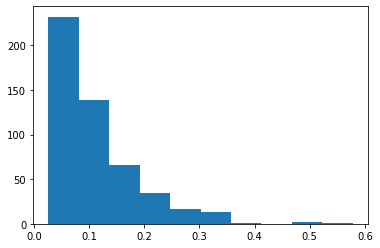

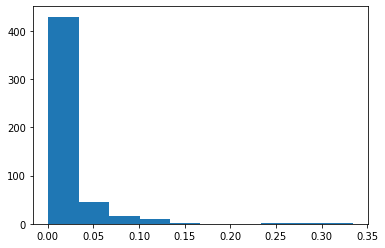

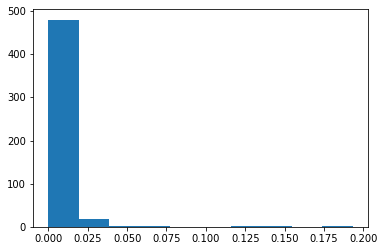

In [278]:

import time
for i in range(1,4):
  plt.hist(temp_dp['LSTAT']**(-i))
  plt.show()


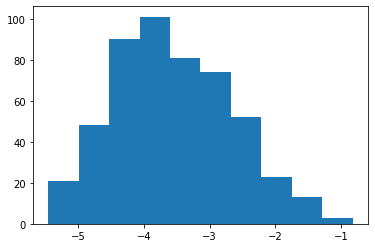

In [279]:
plt.hist(np.log(temp_dp['LSTAT']**(-1)))
plt.show()

In [280]:
def outliers(features,df):
  Q1 = df[[features]].quantile(q = 0.25)[0]
  Q3 = df[[features]].quantile(q = 0.75)[0]
  iqr = Q3 - Q1
  min_iqr = Q1 - 1.5*iqr
  max_iqr = Q3 + 1.5*iqr
  return min_iqr,max_iqr,df[[features]].min()[0],df[[features]].max()[0]



for i in df.iloc[:,[0,1,6,7,8,10,11]].columns:
  if i == 'status':
    continue
  c=0
  min_iqr,max_iqr,min_value,max_value = outliers(i,df)
  if min_value < min_iqr:
    c+=1
    print('Column ->',i)
    print('--->low bound Outliers at',min_iqr)
  if max_value > max_iqr:
    if c==0:
      print('Column ->',i)
    print('--------->uppar bound Outliers at',max_iqr)
  print()
  print('Conver outliers to nan')
  def convert_nan(x,min_iqr = min_iqr,max_iqr = max_iqr):
    if (x<min_iqr):
      x=(min_iqr*1.5)
    elif (x>max_iqr):
      x=(max_iqr*1.5)
    else:
      x = x
    return x
  df[i] = df[i].map(convert_nan)
  df[i] = df[i].fillna(replace)

Column -> CRIM
--------->uppar bound Outliers at 9.06963875

Conver outliers to nan
Column -> ZN
--------->uppar bound Outliers at 31.25

Conver outliers to nan

Conver outliers to nan
Column -> DIS
--------->uppar bound Outliers at 9.820800000000002

Conver outliers to nan

Conver outliers to nan
Column -> B
--->low bound Outliers at 344.10624999999993

Conver outliers to nan
Column -> LSTAT
--------->uppar bound Outliers at 31.962500000000006

Conver outliers to nan


In [282]:
df['LSTAT'] = np.log(temp_dp['LSTAT']**(-1.5))

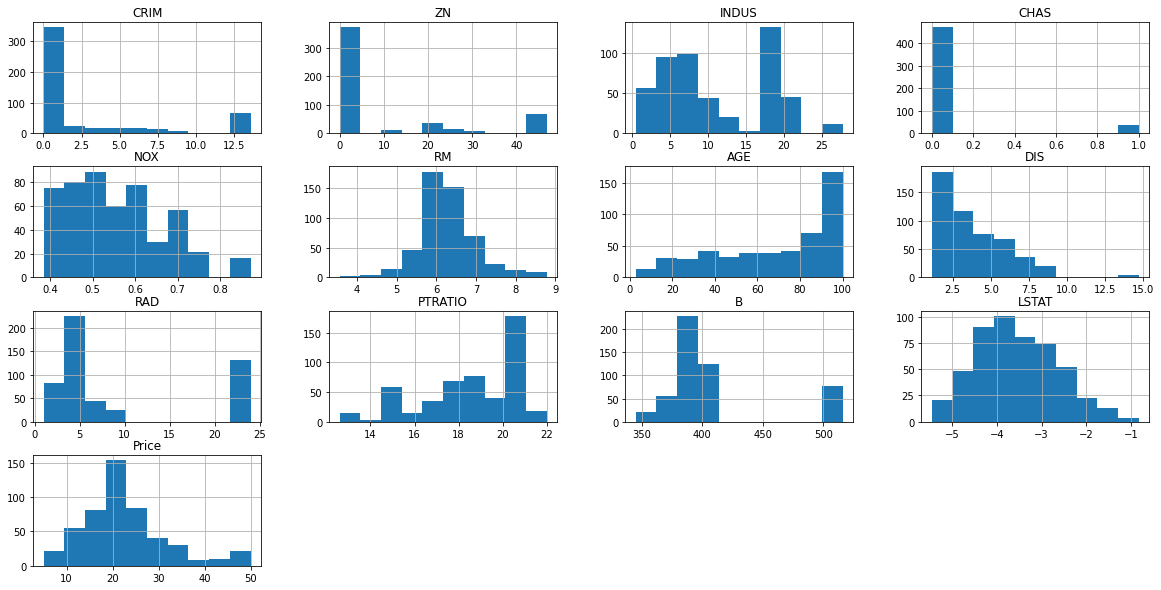

In [283]:
ax = df.hist(figsize=(20,10))

In [234]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,1.605430,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,2.212660,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,1.393766,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,1.078410,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,1.673351,36.2


In [235]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.816530,9.063241,11.136779,0.069170,0.554695,6.284634,68.574901,3.832469,9.549407,18.455534,408.100834,2.371663,22.532806
std,4.629101,16.593497,6.860353,0.253994,0.115878,0.702617,28.148861,2.259933,8.707259,2.164946,46.967127,0.598971,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,12.600000,344.910000,0.652325,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,17.400000,388.115000,1.938729,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,19.050000,394.695000,2.430097,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,20.200000,396.900000,2.830563,25.000000
max,13.604458,46.875000,27.740000,1.000000,0.871000,8.780000,100.000000,14.731200,24.000000,22.000000,516.159375,3.636796,50.000000


In [284]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

In [285]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [287]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [288]:
print(X_train.shape)
print(y_train.shape)

(404, 12)
(404,)


In [289]:
xg = XGBRegressor()
xg.fit(X_train,y_train)
XG_prdict = xg.predict(X_test)
print('XG accuracy:',(xg.score(X_train,y_train))*100)

[01:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG accuracy: 97.12055395990016


In [290]:
metrics.r2_score(y_test,XG_prdict)

0.8952703665720277

In [291]:
metrics.mean_absolute_error(y_test,XG_prdict)

2.170730158861945

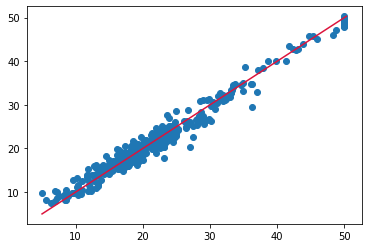

In [292]:
y_pred = xg.predict(X_train)
plt.scatter(y_train,y_pred)
p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-',c='crimson')
plt.show()

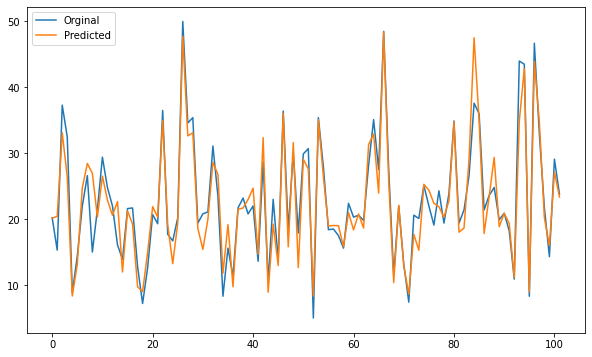

In [293]:
plt.figure(figsize=(10,6))
plt.plot(np.array(y_test), label ="Orginal")
plt.plot(XG_prdict,label = "Predicted")
plt.legend()
plt.show()

In [294]:
min_max = MinMaxScaler((-1,1))
X = min_max.fit_transform(X)

In [295]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=7)

In [296]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_train,y_train)

0.802973772337118